In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cirrhosis-prediction/train.csv
/kaggle/input/cirrhosis-prediction/test.csv


In [2]:
df=pd.read_csv('/kaggle/input/cirrhosis-prediction/train.csv')

In [3]:
test_df=pd.read_csv('/kaggle/input/cirrhosis-prediction/test.csv')

In [4]:
import warnings
warnings.filterwarnings("ignore")
print(df.head())

   id  N_Days             Drug      Age Sex Ascites Hepatomegaly Spiders  \
0   0  2527.0          Placebo  15265.0   F       N            Y       N   
1   1  1581.0              NaN  24472.0   F     NaN          NaN     NaN   
2   2  1119.0              NaN  19358.0   F     NaN          NaN     NaN   
3   3  2692.0  D-penicillamine  15177.0   F       N            N       N   
4   4  2022.0  D-penicillamine  22514.0   F       N            Y       Y   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos   SGOT  \
0     N        2.3        472.0     3.54    73.0     936.0  97.00   
1     N        0.6          NaN     3.06     NaN       NaN    NaN   
2     N        0.6          NaN     3.81     NaN       NaN    NaN   
3     N        1.1        268.0     3.61   150.0    1509.0  88.35   
4     N        0.9        223.0     3.60    13.0    1062.0  55.80   

   Tryglicerides  Platelets  Prothrombin  Stage Status  
0          114.0      195.0          9.9    2.0      C  
1            N

In [5]:
df.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,15000.000000,15000.000000,15000.000000,15000.000000,6584.000000,15000.000000,8335.000000,8409.000000,8410.000000,6555.000000,14444.000000,14979.000000,15000.000000
mean,7499.500000,1973.555067,19337.723000,1.870249,327.094927,3.524000,75.159568,1647.834486,105.506270,111.687262,252.989621,10.634555,3.016933
std,4330.271354,1252.981613,3654.208627,2.752110,176.075668,0.377667,75.488596,1844.671645,49.712528,53.152605,93.444052,0.766079,0.879336
min,0.000000,3.000000,91.000000,0.150000,119.000000,1.960000,3.000000,2.750000,16.200000,11.000000,0.400000,1.900000,1.000000
25%,3749.750000,1095.000000,16728.000000,0.600000,242.000000,3.290000,31.000000,721.000000,71.000000,78.000000,182.000000,10.100000,2.000000
50%,7499.500000,1831.000000,19722.000000,0.900000,280.000000,3.580000,52.000000,1070.000000,97.650000,99.000000,249.000000,10.600000,3.000000
75%,11249.250000,2644.000000,22388.000000,1.800000,364.000000,3.770000,89.000000,1653.000000,130.200000,134.000000,311.000000,11.000000,4.000000
max,14999.000000,27220.000000,35463.000000,28.000000,1868.000000,4.700000,608.000000,24201.200000,601.250000,608.000000,721.000000,18.000000,4.000000


In [6]:
# Inspect those rows with 4.07
df[df['Hepatomegaly'] == '4.07']

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
4506,4506,207.0,D-penicillamine,19544.0,M,N,4.07,N,N,5.1,NaN,2.1,234.0,601.0,135.0,NaN,207.0,12.1,4.0,D


In [7]:
nominal_cols=['Drug','Sex','Ascites','Hepatomegaly','Spiders','Edema','Status']
for col in nominal_cols:
    print(f"\nUnique values in '{col}':")
    print(df[col].dropna().unique())


Unique values in 'Drug':
['Placebo' 'D-penicillamine']

Unique values in 'Sex':
['F' 'M']

Unique values in 'Ascites':
['N' 'Y']

Unique values in 'Hepatomegaly':
['Y' 'N' '4.07']

Unique values in 'Spiders':
['N' 'Y']

Unique values in 'Edema':
['N' 'S' 'Y']

Unique values in 'Status':
['C' 'D' 'CL']


In [8]:
df['Hepatomegaly'] = df['Hepatomegaly'].replace('4.07', np.nan)
df['Hepatomegaly'] = df['Hepatomegaly'].map({'N': 0, 'Y': 1})
df['Drug'] = df['Drug'].map({'Placebo': 0, 'D-penicillamine': 1})
df['Sex'] = df['Sex'].map({'F': 0, 'M': 1})
df['Ascites'] = df['Ascites'].map({'N': 0, 'Y': 1})
df['Spiders'] = df['Spiders'].map({'N': 0, 'Y': 1})
df['Edema'] = df['Edema'].map({'N': 0, 'S': 1, 'Y': 2})
df = pd.get_dummies(df, columns=['Status'], prefix='Status')

In [9]:
import numpy as np
import pandas as pd

# Apply transformations to test_df
test_df['Hepatomegaly'] = test_df['Hepatomegaly'].replace('4.07', np.nan)
test_df['Hepatomegaly'] = test_df['Hepatomegaly'].map({'N': 0, 'Y': 1})
test_df['Drug'] = test_df['Drug'].map({'Placebo': 0, 'D-penicillamine': 1})
test_df['Sex'] = test_df['Sex'].map({'F': 0, 'M': 1})
test_df['Ascites'] = test_df['Ascites'].map({'N': 0, 'Y': 1})
test_df['Spiders'] = test_df['Spiders'].map({'N': 0, 'Y': 1})
test_df['Edema'] = test_df['Edema'].map({'N': 0, 'S': 1, 'Y': 2})

# One-hot encode the 'Status' column (if present)
if 'Status' in test_df.columns:
    test_df = pd.get_dummies(test_df, columns=['Status'], prefix='Status')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15000 non-null  int64  
 1   N_Days         15000 non-null  float64
 2   Drug           8415 non-null   float64
 3   Age            15000 non-null  float64
 4   Sex            15000 non-null  int64  
 5   Ascites        8424 non-null   float64
 6   Hepatomegaly   8413 non-null   float64
 7   Spiders        8414 non-null   float64
 8   Edema          15000 non-null  int64  
 9   Bilirubin      15000 non-null  float64
 10  Cholesterol    6584 non-null   float64
 11  Albumin        15000 non-null  float64
 12  Copper         8335 non-null   float64
 13  Alk_Phos       8409 non-null   float64
 14  SGOT           8410 non-null   float64
 15  Tryglicerides  6555 non-null   float64
 16  Platelets      14444 non-null  float64
 17  Prothrombin    14979 non-null  float64
 18  Stage 

In [11]:
# Using pandas
df.skew(numeric_only=True)  # Shows skewness for each numeric column


id               0.000000
N_Days           4.658358
Drug            -0.111661
Age             -0.288314
Sex              4.518106
Ascites          4.371117
Hepatomegaly     0.202419
Spiders          1.485304
Edema            3.970258
Bilirubin        4.041833
Cholesterol      4.570320
Albumin         -0.332126
Copper           3.155200
Alk_Phos         3.311105
SGOT             1.845197
Tryglicerides    2.558042
Platelets        0.561408
Prothrombin      1.717930
Stage           -0.488897
Status_C        -0.765591
Status_CL        6.033525
Status_D         0.894565
dtype: float64

In [12]:
from sklearn.preprocessing import PowerTransformer
skew_values = df.skew(numeric_only=True)
highly_skewed_cols=skew_values[skew_values.abs()>1].index.tolist()
pt = PowerTransformer(method='yeo-johnson')  # Works with 0 and negative values
df_transformed = df.copy()
df_transformed[highly_skewed_cols] = pt.fit_transform(df[highly_skewed_cols])

In [13]:
df_transformed.skew(numeric_only=True) 
df=df_transformed

In [14]:
from sklearn.preprocessing import PowerTransformer
skew_values = test_df.skew(numeric_only=True)
highly_skewed_cols=skew_values[skew_values.abs()>1].index.tolist()
pt = PowerTransformer(method='yeo-johnson')  # Works with 0 and negative values
test_df_transformed = test_df.copy()
test_df_transformed[highly_skewed_cols] = pt.fit_transform(test_df[highly_skewed_cols])

In [15]:
test_df_transformed.skew(numeric_only=True) 
test_df=test_df_transformed

In [16]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   N_Days         10000 non-null  float64
 2   Drug           5681 non-null   float64
 3   Age            10000 non-null  float64
 4   Sex            10000 non-null  float64
 5   Ascites        5684 non-null   float64
 6   Hepatomegaly   5679 non-null   float64
 7   Spiders        5680 non-null   float64
 8   Edema          10000 non-null  float64
 9   Bilirubin      10000 non-null  float64
 10  Cholesterol    4482 non-null   float64
 11  Albumin        10000 non-null  float64
 12  Copper         5606 non-null   float64
 13  Alk_Phos       5677 non-null   float64
 14  SGOT           5674 non-null   float64
 15  Tryglicerides  4449 non-null   float64
 16  Platelets      9641 non-null   float64
 17  Prothrombin    9981 non-null   float64
 18  Stage  

In [17]:
# Shows count of missing values per column
missing_counts = df.isnull().sum()

# Shows only columns with at least 1 missing value
missing_cols = missing_counts[missing_counts > 0]

print("Columns with missing values:")
print(missing_cols)


Columns with missing values:
Drug             6585
Ascites          6576
Hepatomegaly     6587
Spiders          6586
Cholesterol      8416
Copper           6665
Alk_Phos         6591
SGOT             6590
Tryglicerides    8445
Platelets         556
Prothrombin        21
dtype: int64


In [18]:
# Shows count of missing values per column
missing_counts = test_df.isnull().sum()

# Shows only columns with at least 1 missing value
missing_cols = missing_counts[missing_counts > 0]

print("Columns with missing values:")
print(missing_cols)


Columns with missing values:
Drug             4319
Ascites          4316
Hepatomegaly     4321
Spiders          4320
Cholesterol      5518
Copper           4394
Alk_Phos         4323
SGOT             4326
Tryglicerides    5551
Platelets         359
Prothrombin        19
dtype: int64


<Axes: >

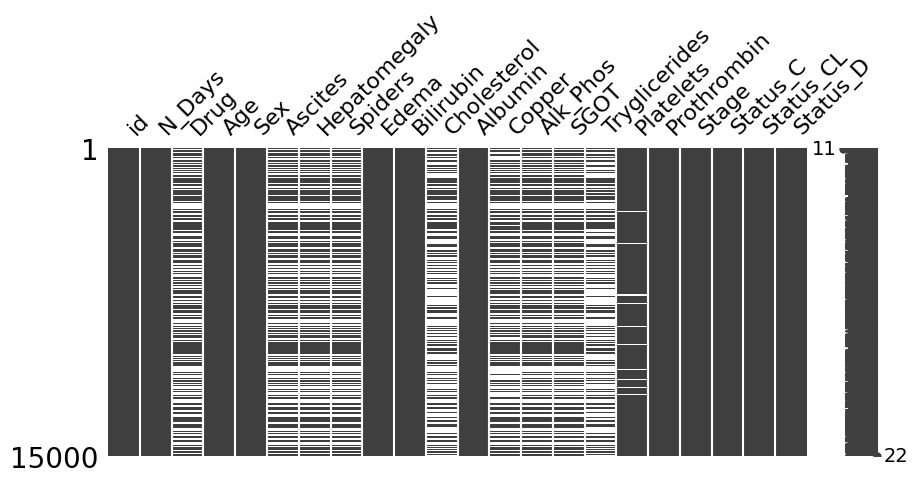

In [19]:
import missingno as msno
msno.matrix(df,figsize=(10,4))

In [20]:
import statsmodels
print(statsmodels.__version__)


0.14.4


In [21]:
import pandas as pd
import numpy as np
from scipy.stats import chi2

def little_mcar_test(df):
    """
    Manual implementation of Little's MCAR test for numeric data.
    """
    df = df.copy()
    df = df.dropna(axis=1, how='all')  # drop columns with all missing
    df = df.dropna(axis=0, how='all')  # drop rows with all missing

    patterns = df.isnull().astype(int)
    pattern_groups = patterns.groupby(list(df.columns)).size().reset_index().rename(columns={0: 'count'})
    
    mu_hat = df.mean()
    cov_hat = df.cov()

    chi_square = 0
    total_count = 0

    for i, row in pattern_groups.iterrows():
        cols_present = [col for col, miss in zip(df.columns, row[:-1]) if miss == 0]
        sub_df = df[cols_present].dropna()
        n_g = row['count']
        if len(cols_present) == 0 or len(sub_df) == 0:
            continue
        mu_g = sub_df.mean()
        diff = mu_g - mu_hat[cols_present]
        cov_g = cov_hat.loc[cols_present, cols_present]
        try:
            inv_cov = np.linalg.inv(cov_g)
            chi_g = n_g * np.dot(np.dot(diff, inv_cov), diff.T)
            chi_square += chi_g
            total_count += n_g
        except np.linalg.LinAlgError:
            pass  # skip singular matrices

    dof = pattern_groups.shape[0] - 1
    p_value = 1 - chi2.cdf(chi_square, dof)

    return chi_square, dof, p_value


In [22]:
# Select only numeric columns with missing values
df_missing = df.select_dtypes(include=['float64', 'int64']).copy()
df_missing = df_missing.loc[:, df_missing.isnull().any()]

chi2_stat, dof, p = little_mcar_test(df_missing)
print(f"Little’s MCAR test: Chi2 = {chi2_stat:.2f}, dof = {dof}, p = {p:.4f}")


Little’s MCAR test: Chi2 = 257.94, dof = 29, p = 0.0000


In [23]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

target_cols = ['Status_C', 'Status_CL', 'Status_D']      # <‑‑ add this line

# --- Identify numeric feature columns that are *not* targets  ---
numeric_cols = df.select_dtypes(include='number').columns.difference(target_cols)

# --- Fit on training numeric features only ---
imp = IterativeImputer(random_state=0)
pt  = PowerTransformer(method="yeo-johnson")

X_train_num = df[numeric_cols]

imp.fit(X_train_num)
pt.fit(imp.transform(X_train_num))

# --- Apply to train ---
df.loc[:, numeric_cols] = pt.transform(imp.transform(X_train_num))

# --- Apply to test (only existing columns, same order) ---
common_cols = [c for c in numeric_cols if c in test_df.columns]
test_df.loc[:, common_cols] = pt.transform(imp.transform(test_df[common_cols]))


In [24]:
print(test_df.isnull().sum())

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64


In [25]:
# 🔹 Step 0: Recreate target column from one-hot encoding
df['Status'] = np.argmax(df[['Status_C', 'Status_CL', 'Status_D']].values, axis=1)

# 🔹 Step 1: Define X and y
X = df.drop(['id', 'Status', 'Status_C', 'Status_CL', 'Status_D'], axis=1)
y = df['Status']


In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.utils.class_weight import compute_sample_weight

# 🔹 Step 0: Assume df has these columns: 'id', 'Status_C', 'Status_CL', 'Status_D', and all features
# 🔹 Reconstruct multiclass labels from one-hot
df['Status'] = np.argmax(df[['Status_C', 'Status_CL', 'Status_D']].values, axis=1)

# 🔹 Step 1: Prepare features and target
X = df.drop(['id', 'Status', 'Status_C', 'Status_CL', 'Status_D'], axis=1)
y = df['Status']

# 🔹 Step 2: Train-test split
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(
    X, y, df['id'], test_size=0.2, stratify=y, random_state=42
)

# ─────────────────────────────────────────────────────────────────────────────
# 3. Compute class‑balanced sample weights
# ─────────────────────────────────────────────────────────────────────────────
sample_weights = compute_sample_weight(class_weight="balanced", y=y_train)

# ─────────────────────────────────────────────────────────────────────────────
# 4. Train XGBoost (multiclass, probability output, log‑loss eval)
# ─────────────────────────────────────────────────────────────────────────────
model = xgb.XGBClassifier(
    objective="multi:softprob",  # softmax probs
    num_class=3,
    eval_metric="mlogloss",      # monitor log‑loss
    use_label_encoder=False,
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42,
)

model.fit(
    X_train,
    y_train,
    sample_weight=sample_weights,              # ⇐ class‑balance here
    eval_set=[(X_test, y_test)],
    verbose=50                                 # print every 50 boosting rounds
)

[0]	validation_0-mlogloss:1.06917
[50]	validation_0-mlogloss:0.63251
[100]	validation_0-mlogloss:0.56830
[150]	validation_0-mlogloss:0.53792
[200]	validation_0-mlogloss:0.51782
[250]	validation_0-mlogloss:0.50062
[300]	validation_0-mlogloss:0.48722
[350]	validation_0-mlogloss:0.47564
[400]	validation_0-mlogloss:0.46620
[450]	validation_0-mlogloss:0.45775
[499]	validation_0-mlogloss:0.45184


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=2, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_class=3, num_parallel_tree=None, ...)

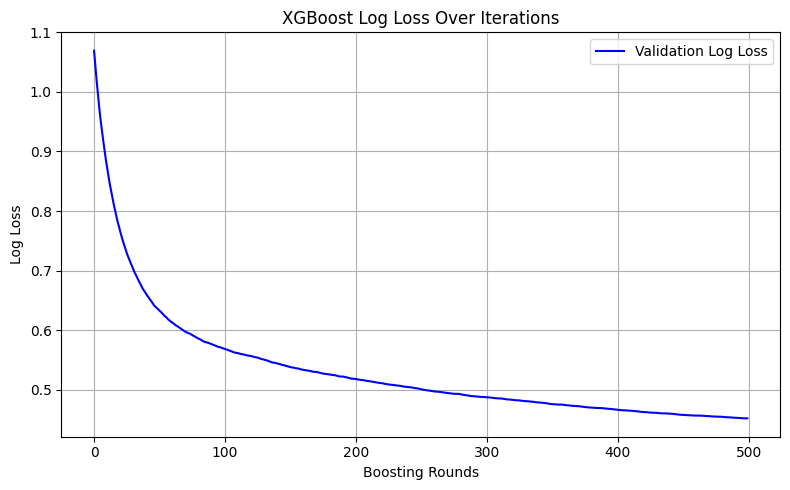

In [27]:
import matplotlib.pyplot as plt

# Extract training log-loss from model
results = model.evals_result()

# Plot
plt.figure(figsize=(8, 5))
plt.plot(results['validation_0']['mlogloss'], label='Validation Log Loss', color='blue')
plt.xlabel("Boosting Rounds")
plt.ylabel("Log Loss")
plt.title("XGBoost Log Loss Over Iterations")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [28]:
y_pred_proba=model.predict_proba(X_test)
y_pred=model.predict(X_test)

Log Loss: 0.4518
Accuracy: 0.8287
Classification Report:

              precision    recall  f1-score   support

           C       0.91      0.86      0.89      2036
          CL       0.25      0.46      0.32        76
           D       0.75      0.78      0.76       888

    accuracy                           0.83      3000
   macro avg       0.64      0.70      0.66      3000
weighted avg       0.85      0.83      0.84      3000



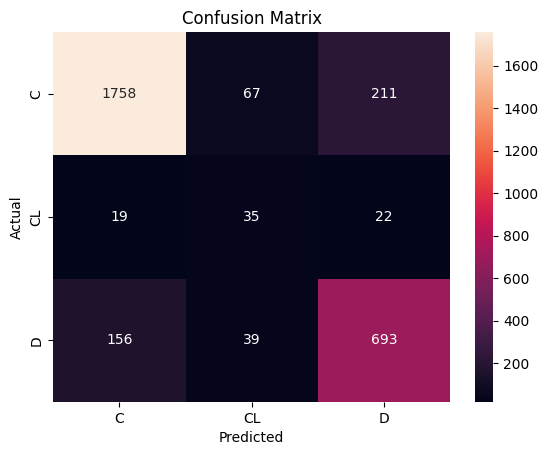

In [29]:
from sklearn.metrics import log_loss,accuracy_score,classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
logloss=log_loss(y_test,y_pred_proba)
acc=accuracy_score(y_test,y_pred)
print(f"Log Loss: {logloss:.4f}")
print(f"Accuracy: {acc:.4f}")
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['C', 'CL', 'D']))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['C', 'CL', 'D'], yticklabels=['C', 'CL', 'D'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [30]:
# 🔹 Step 4: Predict class probabilities
y_pred_proba = model.predict_proba(X_test)  # shape = (n_samples, 3)

# 🔹 Step 5: Prepare output for submission
output = pd.DataFrame(y_pred_proba, columns=['Status_C', 'Status_CL', 'Status_D'])
output['id'] = id_test.values
output = output[['id', 'Status_C', 'Status_CL', 'Status_D']]

# 🔹 Step 6: Save to CSV
output.to_csv('submission.csv', index=False)

In [31]:
# 🔹 Step 7: Verify number of rows in saved CSV
submission_check = pd.read_csv('submission.csv')
print("Number of rows in submission.csv:", len(submission_check))


Number of rows in submission.csv: 3000


In [32]:
print("X_test shape:", X_test.shape)
print("id_test length:", len(id_test))


X_test shape: (3000, 18)
id_test length: 3000


In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import xgboost as xgb

# 🔹 Step 0: Reconstruct multiclass labels from one-hot columns
df['Status'] = np.argmax(df[['Status_C', 'Status_CL', 'Status_D']].values, axis=1)

# 🔹 Step 1: Prepare features and target
X = df.drop(['id', 'Status', 'Status_C', 'Status_CL', 'Status_D'], axis=1)
y = df['Status']

# 🔹 Step 2: Train-test split (stratified)
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(
    X, y, df['id'], test_size=0.2, stratify=y, random_state=42
)

# ─────────────────────────────────────────────────────────────────────────────
# 3. Compute class-balanced sample weights
# ─────────────────────────────────────────────────────────────────────────────
# Compute weights for each class (inverse frequency)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)

# Map weights to each sample in y_train
weight_map = {cls: wt for cls, wt in zip(np.unique(y_train), class_weights)}
sample_weights = y_train.map(weight_map)

# ─────────────────────────────────────────────────────────────────────────────
# 4. Train XGBoost (multiclass, probability output, log‑loss eval)
# ─────────────────────────────────────────────────────────────────────────────
model = xgb.XGBClassifier(
    objective="multi:softprob",  # softmax probs
    num_class=3,
    eval_metric="mlogloss",      # monitor log‑loss
    use_label_encoder=False,
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42,
)

# Fit with per-sample weights
model.fit(
    X_train,
    y_train,
    sample_weight=sample_weights,
    eval_set=[(X_test, y_test)],
    verbose=50
)


[0]	validation_0-mlogloss:1.06917
[50]	validation_0-mlogloss:0.63251
[100]	validation_0-mlogloss:0.56830
[150]	validation_0-mlogloss:0.53792
[200]	validation_0-mlogloss:0.51782
[250]	validation_0-mlogloss:0.50062
[300]	validation_0-mlogloss:0.48722
[350]	validation_0-mlogloss:0.47564
[400]	validation_0-mlogloss:0.46620
[450]	validation_0-mlogloss:0.45775
[499]	validation_0-mlogloss:0.45184


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=2, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_class=3, num_parallel_tree=None, ...)

In [34]:
print("Class Weights:", weight_map)


Class Weights: {0: 0.4910988336402701, 1: 13.114754098360656, 2: 1.1267605633802817}


In [35]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["C", "CL", "D"]))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           C       0.91      0.86      0.89      2036
          CL       0.25      0.46      0.32        76
           D       0.75      0.78      0.76       888

    accuracy                           0.83      3000
   macro avg       0.64      0.70      0.66      3000
weighted avg       0.85      0.83      0.84      3000

Confusion Matrix:
[[1758   67  211]
 [  19   35   22]
 [ 156   39  693]]


In [36]:
from sklearn.metrics import f1_score
f1_macro = f1_score(y_test, model.predict(X_test), average='macro')
print("Macro F1 Score:", f1_macro)


Macro F1 Score: 0.6575011447728683


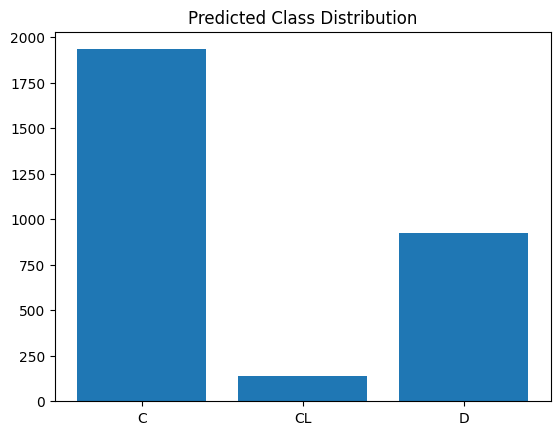

In [37]:
import matplotlib.pyplot as plt

_, counts = np.unique(model.predict(X_test), return_counts=True)
plt.bar(["C", "CL", "D"], counts)
plt.title("Predicted Class Distribution")
plt.show()


In [38]:
# Predict class probabilities: shape = (n_samples, 3)
y_pred_proba = model.predict_proba(test_df[X_train.columns])


In [39]:
submission = pd.DataFrame(y_pred_proba, columns=['Status_C', 'Status_CL', 'Status_D'])
submission['id'] = test_df['id'].values
submission = submission[['id', 'Status_C', 'Status_CL', 'Status_D']]


In [40]:
submission.to_csv('submission.csv', index=False)
print("✅ submission.csv saved with", len(submission), "rows.")


✅ submission.csv saved with 10000 rows.
